<a href="https://colab.research.google.com/github/SandraPinto/Recurrent-Neural-Network-with-PyTorch/blob/main/ProjectFinalVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA 602 FINAL RESEARCH PROJECT

SANDRA PINTO

**SUMMARY**

The name of the notebook I chose for my project is ***Recurrent Neural Network with PyTorch*** Tutorial from the Digit Recognizer Kaggle Competition using the popular MNIST data, which competition started 8 years ago (LINK TO NOTEBOOOK PROVIDED ON SOURCES SECTION BELOW). The notebook was created by the DATAI TEAM based in Turkey which has achieved the Notebooks grandmaster notation in Kaggle (DATAI TEAM,KAGGLE).
My motivation to work with PyTorch instead of Tensorflow was to explore a DL framework that we have not discussed in class and apply it into creating a RNN (used for sequential data for text classifactions problems) to expand my skillset. Also, I was prompted to chose a high ranked notebook from a Kaggle competition.

PyTorch is a popular deep learning framework developed by Facebook mainly used in academia and research with the purpose to replace numpy-like operations with GPU-accelerated operations and Build deep neural networks. PyTorch provides two kinds of data abstractions called tensors and variables.Tensors
are similar to numpy arrays and they can also be used on GPUs, which provide increased performance.According to the book Deep Learning with PyTorch the main pros of PyTorch are; ease of use and simplicity, easier-to-debug nature, dynamic computation which allows greater flexibility in building complex architectures(unlike other popular DL frameworks),extensive use of Python concepts to build algorithms in a pure oject-oriented fashion,and strong growing support from various companies such as Salesforce (Subramanian, 2018, page. 16). Along with the pros also come the cons, a third-party is needed for visualization and there are limited references and resources outside of the official documentation.

PyTorch and TensorFlow follow different approaches when it comes to visualization, deployment, development, and debugging. The Article PyTorch vs TensorFlow — spotting the difference, describes the main differeces between PyTorch and Tensorflow which are the following (Dubovikov,2018): 
*   While TensorFlow is produced by Google, PyTorch is maintained by Facebook.
*   TensorFlow is older and has a larger community than PyTorch, which is a “new” version of the Torch library.
*   TensorFlow is widely used in industry, while PyTorch is often used in academia.
*   In terms of visualization Tensorflow does not need a third party unlike PyTorch
*   In terms of deployment, TensorFlow is better because it lets you deploy your models on a specialized gRPC service and mobile is also supported. Otherwise, Python may use a flask or another alternative to code up a REST API on top of the model
*   In TensorFlow you define the graphics statically before a model can be executed so it's more static.PyTorch is more imperative and dynamic. You can define, change and execute nodes as you like, no special session interfaces or placeholders.

I encountered a few problems which were mostly debugging such as “file not found error” which I addressed by looking for the corresponding library path and updating my notebook with the library path name based on how I saved the repository date files in my drive. I decided to mount my drive into my notebook instead of uploading the data files as sample data so they don't disappear after a new session. However, I learned that importing my data this way was not very effective when sharing my data as other authorized users were not able to re-run my codes. Therefore, I imported the data files by using the shareable drive url.

In the following lines we will be exploring building RNN using PyTorch and visualizing our findings.

**EXERCISE**

In lines#1, I imported the initial packages and libraries such as numpy for linear algebra, pandas for data processing ,and matplotlib for plotting 

In [ ]:
import os
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In line#2, I Imported the necessary libraries and packages for implementing recurrent neural networks using PyTorch. Python APIs: torch for data structures for multidimensional sensors, torch n.n-module parameter, torch.autograd for classes and to implement automatic differentiation, sklearn to train the model, and torch.utils.data for data loading utility

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In #3 I imported my shareable files from drive by using shearable URL

In [ ]:
import pandas as pd
url = "https://drive.google.com/uc?export=download&id=1EcaiGFjYz4mZxXFDT3gHsrhm-87pNVdM"
df = pd.read_csv(url)

line#4-Preparing the Dataset 
1.   Prepared the data to load and training the train.csv file
2.   Split into features (pixels) and labels from 0 to 9
3.   Training the test split. Size of the train data is set at 80% and the size of test data is 20%, random state is 42
4. We need a variable to accumulate gradients. Therefore, I created a tensor and later a variable. We train the features and targets for the train set and train the features and targets for the test set.
5. The batch size used is 100 and the number of iterations is 10000
6. Pytorch train and test sets
7. I conducted dataloader for both train and test data
8. I visualized one of the images from the dataset which in this case was a yellow number 8.

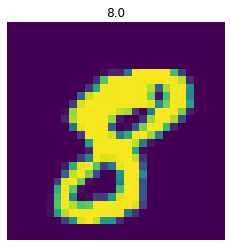

In [ ]:
train = pd.read_csv("https://drive.google.com/uc?export=download&id=1EcaiGFjYz4mZxXFDT3gHsrhm-87pNVdM",dtype = np.float32)

#2 split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

#3 train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 
#4 create feature and targets tensor for train set.
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

#5 batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

#6 Pytorch train and test sets
train = TensorDataset(featuresTrain,targetsTrain)
test = TensorDataset(featuresTest,targetsTest)

#7 data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

#8 visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In line#5, I've created the RNN Model and set parameters including number of hidden dimensions, hidden layers, readout layer, input and output dimensions. Also, built the model for cross entropy loss (measures the performance of a classification model whose output is a probability value between 0 and 1) and set the parameters for SGD optimizer which are later calculated on line 6. 

"A cross-entropy loss calculates the loss of a classification
network predicting the probabilities, which should sum up to one, like our softmax layer.A cross-entropy loss increases when the predicted probability diverges from the correct
probability"(Subramanian, 2018, page.48)

"A SGD optimizer takes all the learnable
parameters of your network as the first argument and a learning rate that determines what ratio of change can be made to the learnable parameter(Subramanian, 2018, page.50)

The hidden layer dimension is set to 100 and number of hidden layers is 1. The number of maximum iterations used here is 8000, batch size 100, input dimension is 28 and output dimension is 10 and the learning rate at .05 or 5%. 

In [ ]:
# Create RNN Model
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu')
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        
        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
            
        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        return out

# batch_size, epoch and iteration
batch_size = 100
n_iters = 8000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = TensorDataset(featuresTrain,targetsTrain)
test = TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create RNN
input_dim = 28    # input dimension
hidden_dim = 100  # hidden layer dimension
layer_dim = 1     # number of hidden layers
output_dim = 10   # output dimension

model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In line #6, I cleared the gradients by setting it to zero, I called a forward propagation to model(train) and later model(images). I calculated the cross entropy loss using Softmax activation (used for multi-class classification) updating the paramaters. Besides from calculating the loss, I also called the backward operation, which calculates the gradients of our learnable parameters. Then, called backward on the loss function, which calculates the gradients, I called optimizer.step(), which makes the actual changes to our learnable parameter. The loss is accumulated across batches for each epoch. 

The accuracy is set at 100% which is the max output. I set 500 = 0 as the starting point or minimum number of iterations. We predict based on the maximum value (output). For every iteration, we calculate the
outputs for loss and accuracy. 
By printing the loss we can conclude that at 7500 iterations, the accuracy is the highest. The loss can vary(not linear), for instance at 7000 iterations the loss is high but the accuracy is high as well. 

In [ ]:
seq_dim = 28  
loss_list = []
iteration_list = []
accuracy_list = []
count = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train  = Variable(images.view(-1, seq_dim, input_dim))
        labels = Variable(labels )
            
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 250 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                images = Variable(images.view(-1, seq_dim, input_dim))
                
                # Forward propagation
                outputs = model(images)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += labels.size(0)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))


Iteration: 500  Loss: 2.139401912689209  Accuracy: 24.58333396911621 %
Iteration: 1000  Loss: 1.0602144002914429  Accuracy: 54.7976188659668 %
Iteration: 1500  Loss: 0.7234361171722412  Accuracy: 80.14286041259766 %
Iteration: 2000  Loss: 0.3809773325920105  Accuracy: 83.77381134033203 %
Iteration: 2500  Loss: 0.1969839334487915  Accuracy: 89.17857360839844 %
Iteration: 3000  Loss: 0.1994304209947586  Accuracy: 92.02381134033203 %
Iteration: 3500  Loss: 0.2909468412399292  Accuracy: 91.98809814453125 %
Iteration: 4000  Loss: 0.11790356040000916  Accuracy: 94.0 %
Iteration: 4500  Loss: 0.35648849606513977  Accuracy: 94.20237731933594 %
Iteration: 5000  Loss: 0.12384200841188431  Accuracy: 95.16666412353516 %
Iteration: 5500  Loss: 0.33108359575271606  Accuracy: 95.27381134033203 %
Iteration: 6000  Loss: 0.16564230620861053  Accuracy: 95.48809814453125 %
Iteration: 6500  Loss: 0.10884163528680801  Accuracy: 95.04762268066406 %
Iteration: 7000  Loss: 0.21673549711704254  Accuracy: 94.2142

In  line#8, we are visualizing the loss and the accuracy which confirms my predictions.

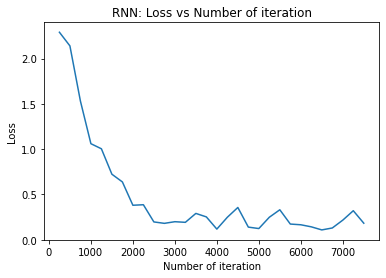

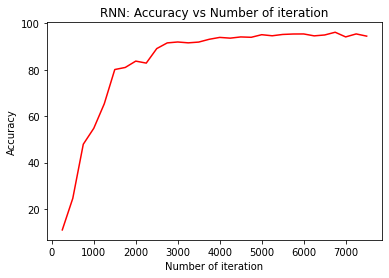

In [ ]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("RNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("RNN: Accuracy vs Number of iteration")
plt.savefig('graph.png')
plt.show()

**CONCLUSION:**

In this tutorial we have learned about the defintion of PyTorch, the pros and the cons, and it's comparison with Tensorflow. We have explored building Recurrent Neural Networks using PyTorch, used softmax activation and Cross entropy to predict loss, calculated loss and accuracy based on number of iterations using specific parameters, and compared and visualized the number of iteration vs loss and accuracy vs number iteration. PyTorch is very dynamic and easy to debug and I will definately use it again for other projects. 

**SOURCES:**

    DATAI TEAM(n.d).Recurrent Neural Network with Pytorch, Version 51. Retrieved May 5, 2020, from https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch/data
    DATAI | Kaggle. (n.d.). Retrieved May 16, 2020, from https://www.kaggle.com/kanncaa1
    Subramanian, V. (2018). Deep learning with pytorch : A practical approach to building neural network models using pytorch. Retrieved from https://ebookcentral.proquest.com/lib/umbc/detail.action?docID=5314603.
    What is PyTorch? —PyTorch Tutorials 1.5.0 documentation. (n.d.). Retrieved May 19, 2020, from https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py
    Dubovikov, K. (2018, October 15). PyTorch vs TensorFlow—Spotting the difference. Medium. https://towardsdatascience.com/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b
